In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [98]:
def unique(lists):
    unique_list = pd.Series(lists).drop_duplicates().tolist()
    for x in unique_list:
        print(x)

In [99]:
tree = pd.read_csv('tree.csv')
tree = tree.drop('Adult', axis = 1)
tree.dropna()
tree.head()

,Unnamed: 0,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,0,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,0,Dead
1,1,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,15.82,31.0700,5.19,20.52,19.29,33,115.5,0.0,0,Alive
2,2,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,Non-Sterile,Heterospecific,EMF,AMF,5/31/18,24.45,28.1900,3.36,24.74,15.01,18,63.0,1.0,0,Dead
3,3,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.23,26.1425,-0.71,14.29,12.36,4,14.0,1.0,0,Dead
4,4,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,21.15,24.0950,-0.58,10.85,11.20,4,14.0,1.0,0,Dead


In [100]:
subplot = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
tree['Subplot'] = tree['Subplot'].map(subplot)

species = {'Acer saccharum': 1, 'Quercus alba': 2, 'Quercus rubra': 3, 'Prunus serotina': 4}
tree['Species'] = tree['Species'].map(species)

light = {'Low': 1, 'Med': 2, 'High': 3}
tree['Light_Cat'] = tree['Light_Cat'].map(light)

soil = {'Prunus serotina': 1, 'Quercus rubra': 2, 'Acer rubrum': 3, 'Populus grandidentata': 4,
        'Sterile': 5, 'Acer saccharum': 6, 'Quercus alba': 7}
tree['Soil'] = tree['Soil'].map(soil)

sterile = {'Non-Sterile': 0, 'Sterile': 1}
tree['Sterile'] = tree['Sterile'].map(sterile)

conspecific = {'Sterilized': 1, 'Heterospecific': 2, 'Conspecific': 3}
tree['Conspecific'] = tree['Conspecific'].map(conspecific)

myco = {'AMF': 1, 'EMF': 2}
tree['Myco'] = tree['Myco'].map(myco)

soilmyco = {'AMF': 1, 'EMF': 2, 'Sterile': 3}
tree['SoilMyco'] = tree['SoilMyco'].map(soilmyco)

alive = {'Alive': 1, 'Dead': 0}
tree['Alive'] = tree['Alive'].map(alive)

In [101]:
tree['PlantDate'] = pd.to_datetime(tree['PlantDate'])

def date_to_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 1
    elif 6 <= month <= 8:
        return 2
    elif 9 <= month <= 11:
        return 3
    else:
        return 4
    
tree['Season'] = tree['PlantDate'].apply(date_to_season)
tree = tree.drop('PlantDate', axis = 1)

In [102]:
pd.set_option('display.max_columns', None)
column_to_move = 'Alive'
tree['Alive'] = tree.pop(column_to_move)
tree = tree.drop('Plot', axis = 1)
tree = tree.drop('Subplot', axis = 1)
tree = tree.drop('Harvest', axis = 1)
tree = tree.drop('Time', axis = 1)
tree = tree.drop('Event', axis = 1)
tree = tree.drop('Census', axis = 1)
tree = tree.dropna()
tree.head()

,Unnamed: 0,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Season,Alive
1,1,2,0.106,2,2017,2,0,2,2,2,15.82,31.0700,5.19,20.52,19.29,1,1
2,2,3,0.106,2,2017,1,0,2,2,1,24.45,28.1900,3.36,24.74,15.01,1,0
3,3,1,0.080,2,2016,1,0,2,1,1,22.23,26.1425,-0.71,14.29,12.36,2,0
4,4,1,0.060,1,2017,1,0,2,1,1,21.15,24.0950,-0.58,10.85,11.20,2,0
5,5,4,0.106,2,2016,3,0,2,1,1,35.29,22.0475,0.30,10.80,13.79,2,0


In [103]:
X = tree.iloc[:, 0:16]
y = tree.iloc[:, -1]
y_label = y.values

columns_list = X.columns.tolist()
tree = pd.DataFrame(X, columns = columns_list)
tree['Alive'] = y_label
tree.groupby('Alive').mean() 

,Unnamed: 0,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Season
Alive,,,,,,,,,,,,,,,,
0,1397.371454,2.483195,0.085188,1.737233,2016.634221,4.016587,0.151899,1.993453,1.354867,1.730685,21.029332,26.860858,1.516517,14.621135,13.409494,1.624182
1,1364.103870,2.511202,0.088088,1.798371,2016.716904,3.808554,0.152749,1.955193,1.957230,1.704684,18.327882,27.355211,3.881976,21.076619,18.003992,1.083503


In [104]:
#Full model
X_full = tree.iloc[:, 0:16] 
y_full = tree.iloc[:, -1]
X_full = mms.fit_transform(X_full)
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, 
                                                                        y_full, 
                                                                        train_size = 0.5, 
                                                                        stratify = y_full, 
                                                                        random_state = 0)
print(tree.groupby('Alive').count())

       Unnamed: 0  Species  Light_ISF  Light_Cat  Core  Soil  Sterile  \
Alive                                                                   
0            2291     2291       2291       2291  2291  2291     2291   
1             491      491        491        491   491   491      491   

       Conspecific  Myco  SoilMyco   AMF   EMF  Phenolics  Lignin   NSC  \
Alive                                                                     
0             2291  2291      2291  2291  2291       2291    2291  2291   
1              491   491       491   491   491        491     491   491   

       Season  
Alive          
0        2291  
1         491  


In [127]:
clf = KMeans(n_clusters = 3)
clf.fit(X_full)
labels = clf.predict(X_full)
mms = MinMaxScaler()

tree['Cluster'] = labels

segment1 = tree[tree['Cluster'] == 0]
segment2 = tree[tree['Cluster'] == 1]
segment3 = tree[tree['Cluster'] == 2]
fulldata = tree
print(tree.groupby('Cluster').mean())

          Unnamed: 0   Species  Light_ISF  Light_Cat         Core      Soil  \
Cluster                                                                       
0        1160.310924  2.472456   0.086102   1.748833  2016.666667  3.742297   
1        1638.180901  2.497671   0.085595   1.748447  2016.595497  3.842391   
2        1225.728132  2.498818   0.084998   1.744681  2016.765957  5.000000   

         Sterile  Conspecific      Myco  SoilMyco        AMF        EMF  \
Cluster                                                                   
0            0.0     2.159664  2.000000  1.492997  19.079645  30.550560   
1            0.0     2.166925  1.000000  1.501553  25.444666  27.356051   
2            1.0     1.000000  1.501182  3.000000   9.385721  16.584848   

         Phenolics     Lignin        NSC    Season     Alive  
Cluster                                                       
0         4.092530  22.237199  17.797003  1.047619  0.374416  
1         0.244837  10.378929  11.37598

In [129]:
segment1_means = segment1.mean()
segment2_means = segment2.mean()
segment3_means = segment3.mean()

feature_differences = segment1_means - segment2_means - segment3_means
print("Feature Differences between segments:")
print(feature_differences)

Feature Differences between segments:
Unnamed: 0    -1703.598109
Species          -2.524033
Light_ISF        -0.084491
Light_Cat        -1.744295
Core          -2016.694788
Soil             -5.100094
Sterile          -1.000000
Conspecific      -1.007262
Myco             -0.501182
SoilMyco         -3.008556
AMF             -15.750742
EMF             -13.390339
Phenolics         2.235542
Lignin           -3.890051
NSC              -7.404633
Season           -2.264438
Alive             0.185466
Cluster          -3.000000
dtype: float64


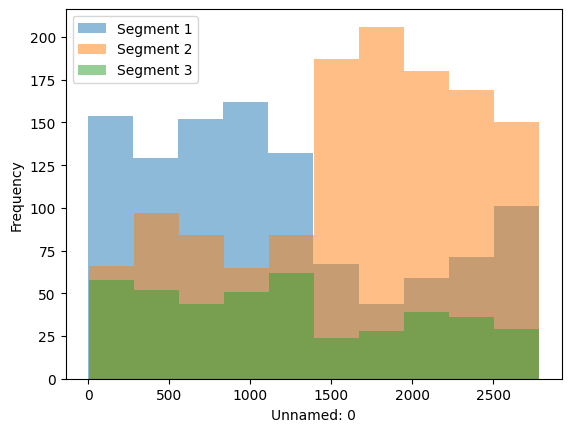

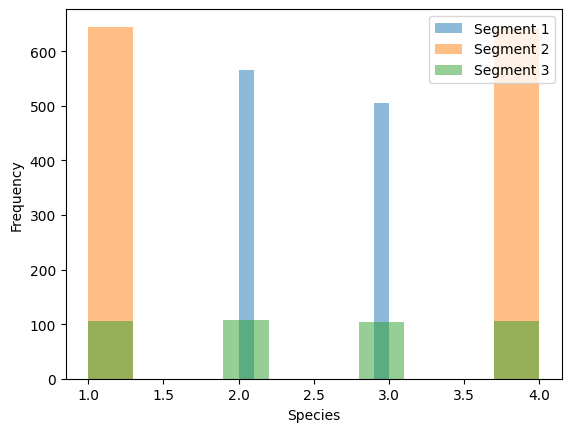

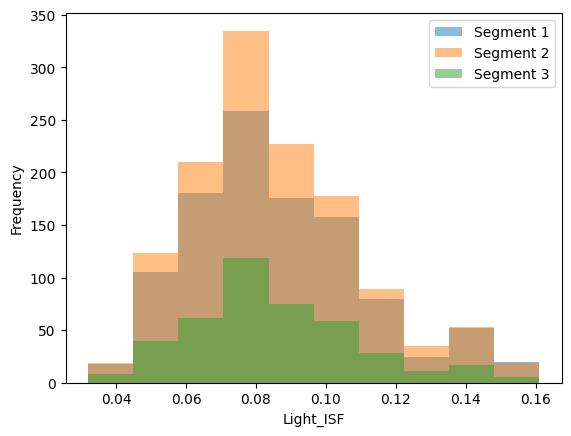

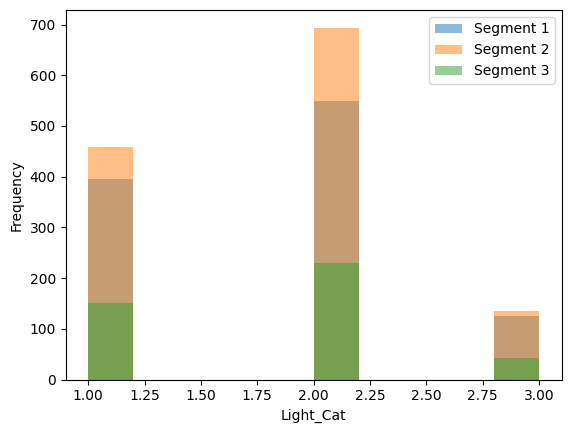

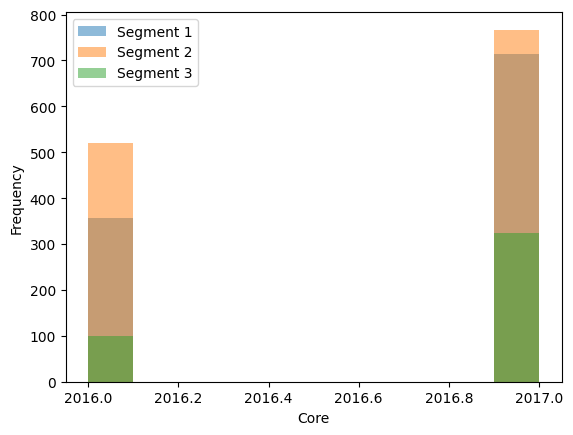

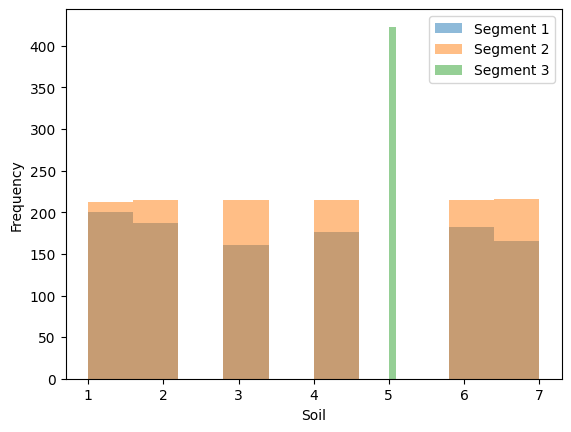

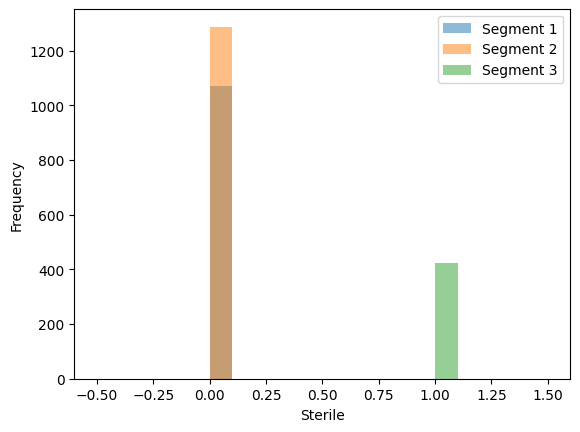

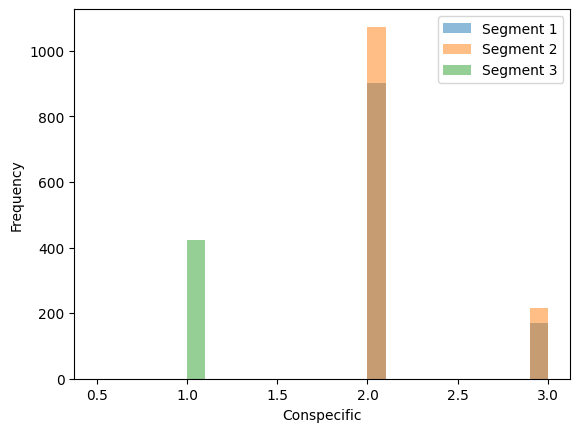

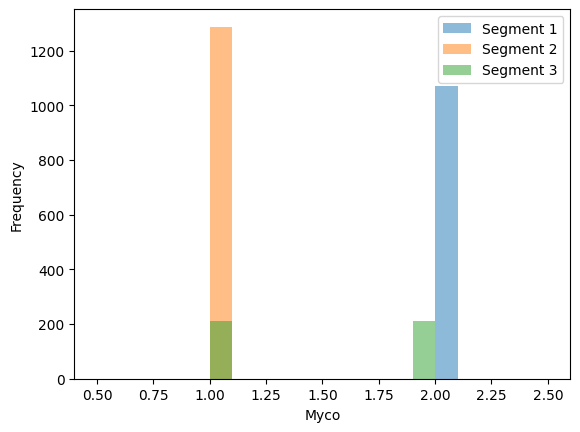

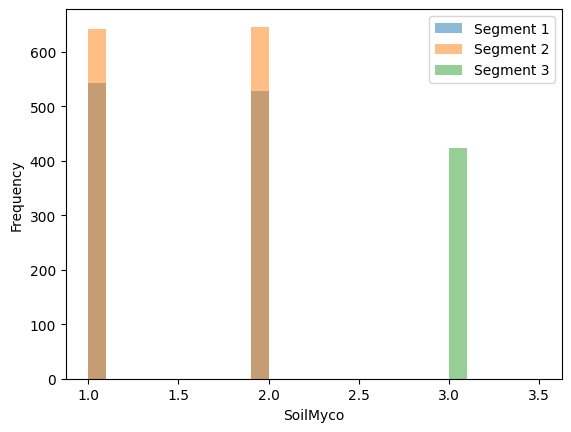

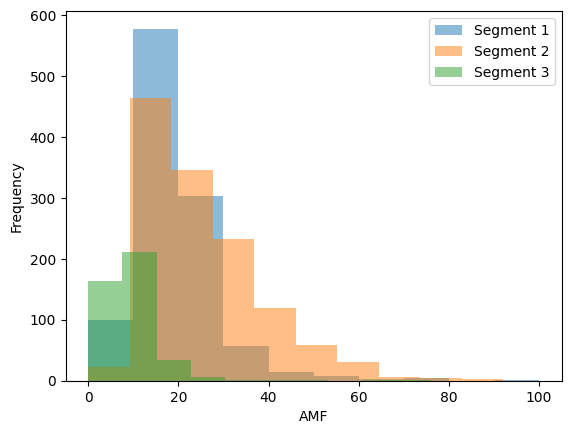

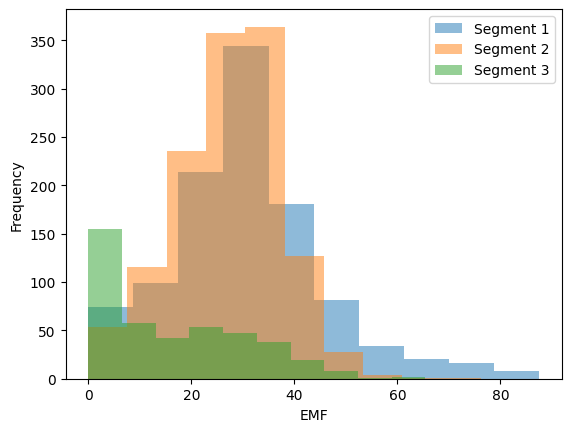

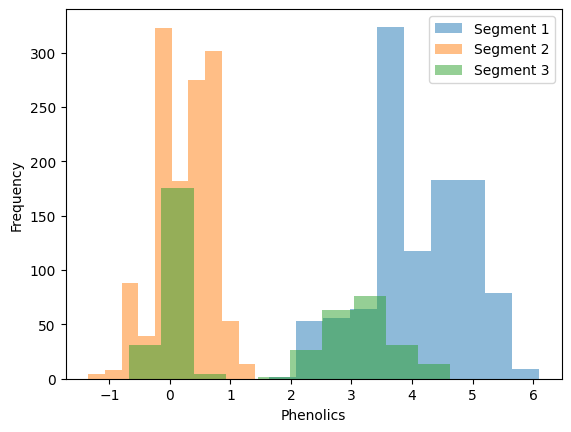

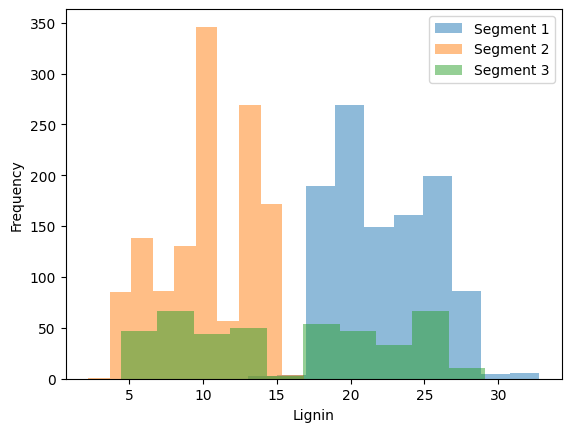

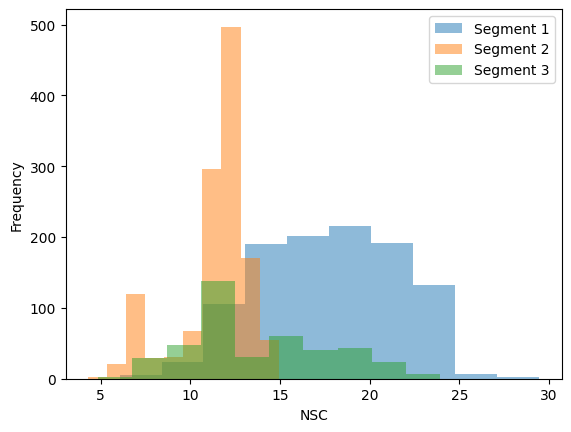

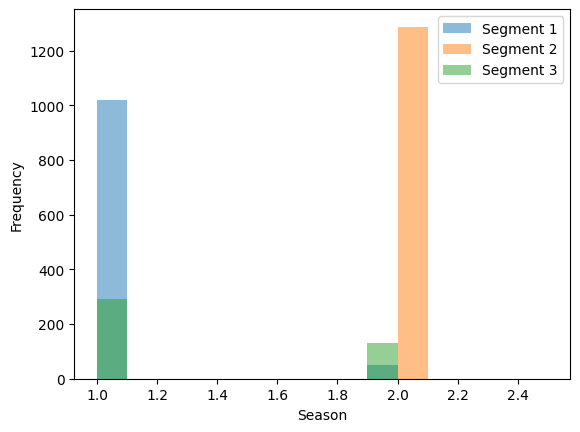

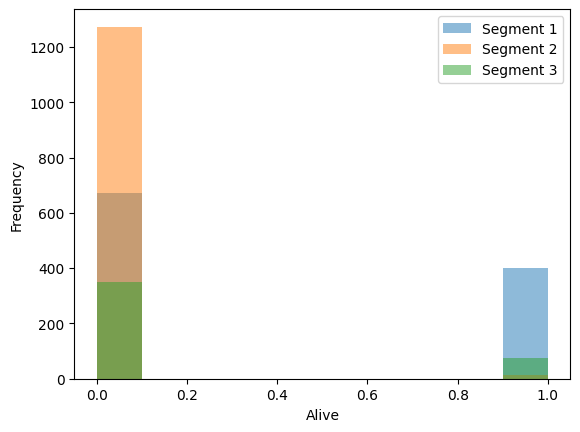

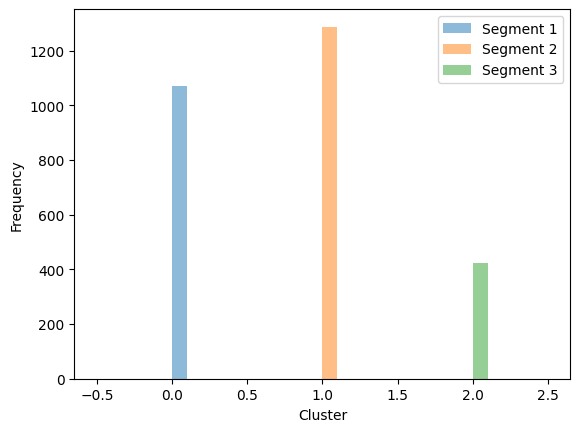

In [130]:
for feature in tree.columns:
    plt.figure()
    plt.hist(segment1[feature], alpha = 0.5, label = 'Segment 1')
    plt.hist(segment2[feature], alpha = 0.5, label = 'Segment 2')
    plt.hist(segment3[feature], alpha = 0.5, label = 'Segment 3')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [106]:
X = tree.iloc[:, 0:16] 
y = tree.iloc[:, -2]
X = mms.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.5,
                                                    stratify = y,
                                                    random_state = 0)

0.8238677210639828


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

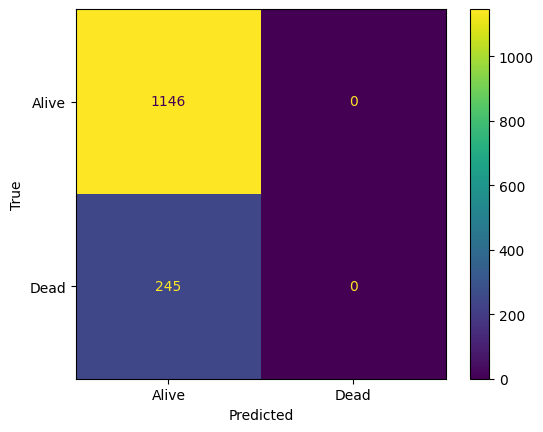

In [107]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

0.8418404025880661


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

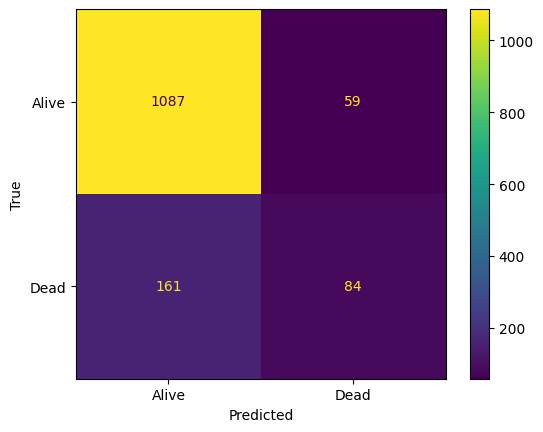

In [108]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [109]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.8231505118485856
Test Set Score: 0.8238677210639828


In [110]:
#Segment 1 model: Cluster 0
X_c0 = segment1.iloc[:, 0:16] 
y_c0 = segment1.iloc[:, -2]
X_c0 = mms.fit_transform(X_c0)
X_train, X_test, y_train, y_test = train_test_split(X_c0,
                                                    y_c0,
                                                    train_size = 0.5,
                                                    stratify = y_c0,
                                                    random_state = 0)

0.6130790190735694


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

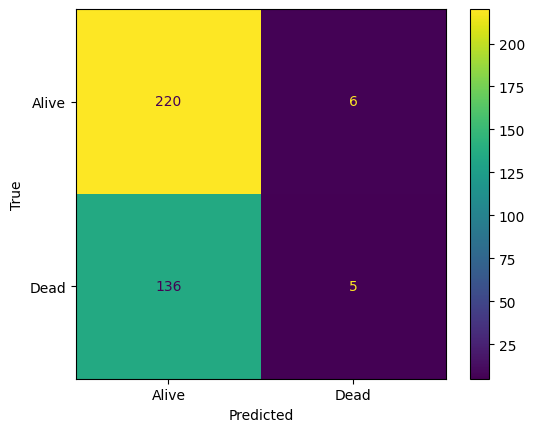

In [111]:
#Cluster 0 model Tree
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

0.6648501362397821


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

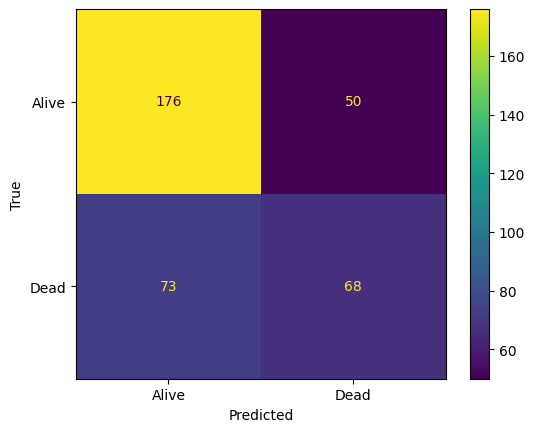

In [112]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [113]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.6174379859311366
Test Set Score: 0.6130790190735694


In [125]:
#Segment 2 model: Cluster 1
X_c1 = segment2.iloc[:, 0:16] 
y_c1 = segment2.iloc[:, -2]
X_c1 = mms.fit_transform(X_c1)
X_train, X_test, y_train, y_test = train_test_split(X_c1,
                                                    y_c1,
                                                    train_size = 0.5,
                                                    stratify = y_c1,
                                                    random_state = 0)
print(y_c1)

3       0
4       0
5       0
9       0
18      0
       ..
2765    1
2774    0
2776    0
2778    0
2782    0
Name: Alive, Length: 1412, dtype: int64


0.6990595611285266


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

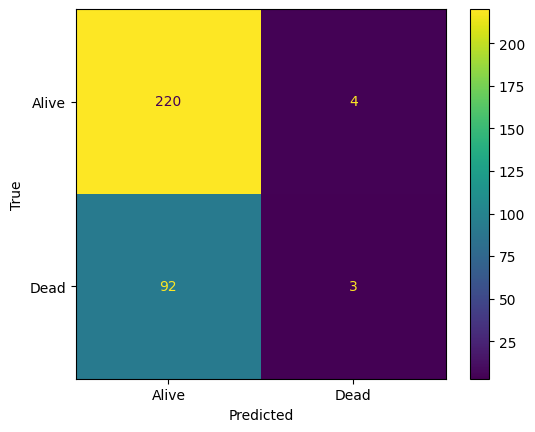

In [124]:
#Cluster 1 model Tree
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

0.664576802507837


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

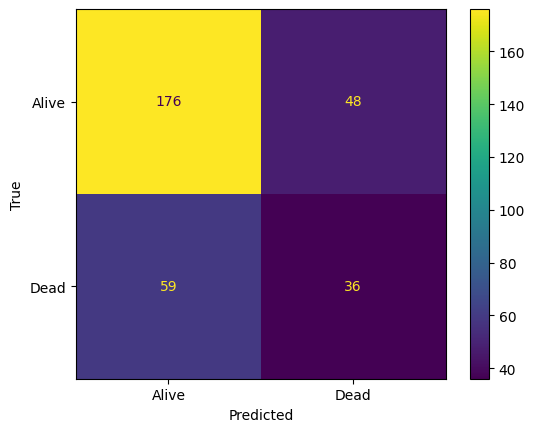

In [122]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [126]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.9858355808610529
Test Set Score: 0.9858356940509915


In [118]:
#Segment 3 model: Cluster 2
X_c2 = segment3.iloc[:, 0:16] 
y_c2 = segment3.iloc[:, -2]
X_c2 = mms.fit_transform(X_c2)
X_train, X_test, y_train, y_test = train_test_split(X_c2,
                                                    y_c2,
                                                    train_size = 0.5,
                                                    stratify = y_c2,
                                                    random_state = 0)

0.6990595611285266


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

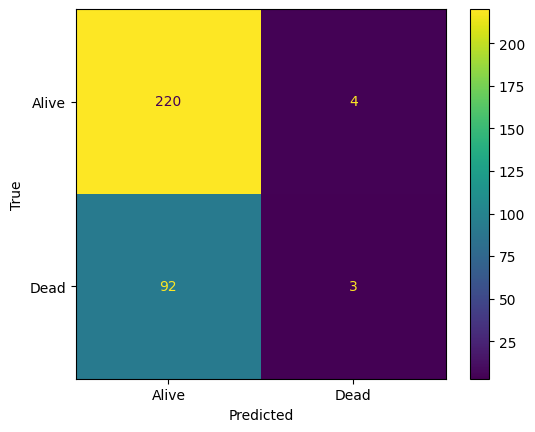

In [119]:
#Cluster 2 model Tree
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

0.664576802507837


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

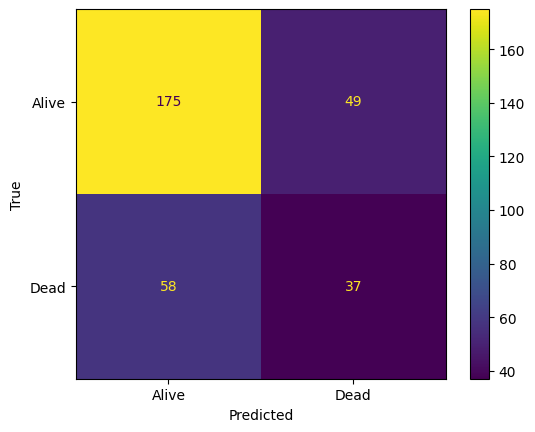

In [120]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [121]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7200892857142858
Test Set Score: 0.6739811912225705
